In [1]:
print 0.00000000000000414285714285714

4.14285714286e-15


In [2]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
mpl.rcParams.update({'font.size': 11, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(style="whitegrid", color_codes=True)

[-0.2 -0.1]


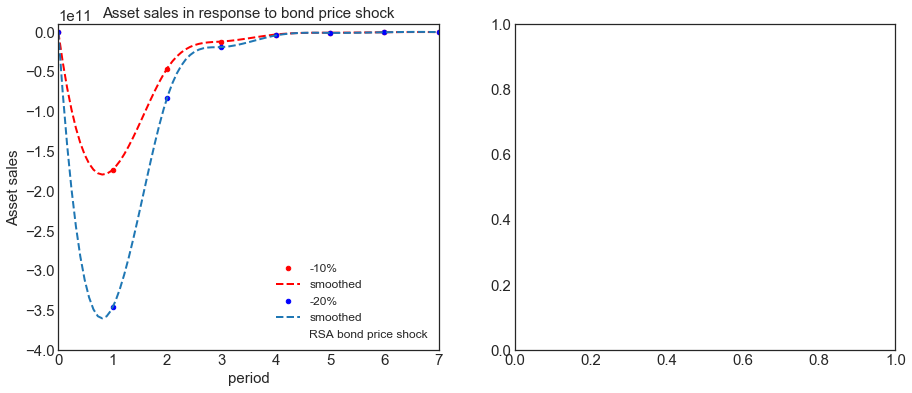

In [13]:
import numpy as np
import pandas as pd
import csv
import matplotlib as mpl
mpl.rcParams.update({'font.size': 15, 'font.family':'serif'})
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
sns.set_style("white")

df = pd.read_csv('test_2.csv')
# df1 = pd.read_csv('del_shock.csv')

#Drag out columns
# x_del = np.array(df1['del_effect'])
# x_total= np.array(df1['total_effect'])
# x_total_negative = -1 * x_total
# y_2= np.array(df['shock'])

df = pd.read_csv('test_2.csv')
keys = np.unique(df['shock'])

print keys
for key in keys:
    if key == -0.1:
        I1 = np.argwhere(df['shock']==key).squeeze()
    if key == -0.2:
        I2 = np.argwhere(df['shock']==key).squeeze()
        

x1 = np.array(df['current_step'][I1])
x1new = np.linspace(0, len(x1), num=100)
x2 = np.array(df['current_step'][I2])
x2new = np.linspace(0, len(x1), num=100)

#For -10%
y1 = df['system_TAS'][I1] 
y2 = df['system_TAS'][I2] 
f1 = UnivariateSpline(x1, y1)
f2 = UnivariateSpline(x2, y2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax[0].plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=2,  ms=4.5, color='r', label="-10%")
ax[0].plot(x2,y2,'bo',  x2new,f2(x2new),'--', lw=2,  ms=4.5, label="-20%")

# plt.plot(x1,y1,'o',  x1new,f1(x1new),'--', lw=1,  ms=3.5, color='r')
# plt.plot(x2,y2,'bo', x2new,f2(x2new),'--', lw=1,  ms=3.5)

ax[0].set_xlim(0, 7)
ax[0].set_xlabel("period", fontsize=15)
ax[0].set_ylim(-4e11, 0.1e11)
ax[0].set_ylabel("Asset sales", fontsize=15)
# ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)
ax[0].set_title("Asset sales in response to bond price shock", fontsize=15)
handles, labels = ax[0].get_legend_handles_labels()
p1 = Rectangle((0,0), 1, 1, fc="w")
handles.append(p1)
labels.append(r'RSA bond price shock')
ax[0].legend(handles, ['-10%', 'smoothed','-20%', 'smoothed', 'RSA bond price shock' ], fontsize=12, loc='best')

plt.show()

fig.savefig('sys_tas_sys_equity.eps', format='eps', dpi=1000)


plt.close()



In [436]:
plt.close()

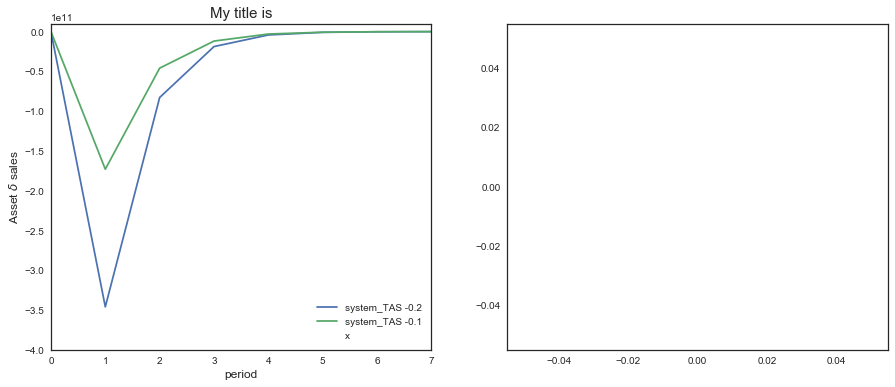

In [437]:
plt.close()


df1 = pd.read_csv('del_shock.csv')
#Drag out columns
x_del = np.array(df1['del_effect'])
x_total= np.array(df1['total_effect'])
x_total_negative = -1 * x_total

y= np.array(df['shock'])

df = pd.read_csv('test_2.csv')
keys = np.unique(df['shock'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
for key in keys:
    I = np.argwhere(df['shock']==key).squeeze()

#print df['current_step'][I]

# nrows=2, ncols=2,
# ax[0,0] top left
# ax[0,1] top right
# ax[row, col]  

    #plt.figure('fig 1')
    ax[0].plot(df['current_step'][I], df['system_TAS'][I], label="system_TAS %s"%key)
    ax[1].plot()

ax[0].set_xlim(0, 7)
ax[0].set_xlabel("period", fontsize=12)
ax[0].set_ylim(-4e11, 0.1e11)
ax[0].set_ylabel(r"Asset $\delta$ sales", fontsize=12)
ax[0].set_title("My title is", fontsize=15)
handles, labels = ax[0].get_legend_handles_labels()
p1 = Rectangle((0,0), 1, 1, fc="w")
handles.append(p1)
ax[0].legend(['data', 'smoothened'], loc='best')
labels.append(r'x')
ax[0].legend(handles, labels)





plt.show()

In [148]:
plt.close()

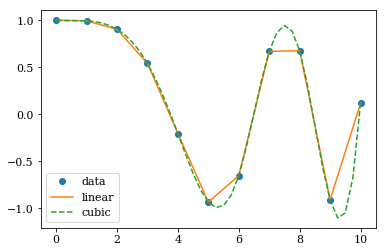

In [149]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [1]:
import matplotlib.pyplot as plt
from scipy import interpolate
x = np.arange(0, 10)


y = np.exp(-x/3.0)
print x, y
f = interpolate.interp1d(x, y)

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.show()

NameError: name 'np' is not defined

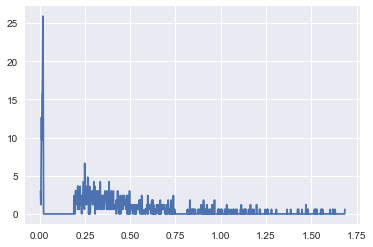

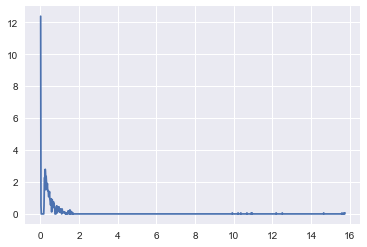

In [13]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
df = pd.read_csv('del_shock.csv')
y = df['deleveraging'] 
x = y*100

x_filt = x[x<2]
# logx = np.log10(x)

nbins = 1000

n, bins = np.histogram(x_filt, nbins, density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)
plt.show()

n, bins = np.histogram(x, nbins, density=1)
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

plt.plot(pdfx, pdfy)
plt.show()

# sns.distplot(x);

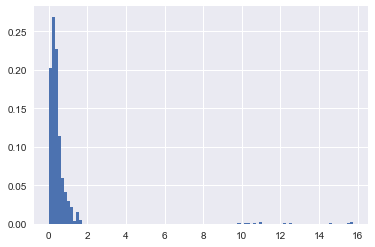

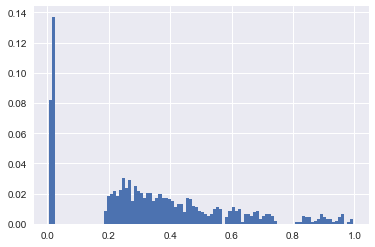

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab



df = pd.read_csv('del_shock.csv')
x = df['deleveraging'] *100

#exclude extreme data
x_filt = x[x<1]

# Histogram:
# Bin it
n, bin_edges = np.histogram(x, 100)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram as a bar plot
plt.bar(bin_middles, bin_probability, width=bin_width)

plt.show()


# Histogram:
# Bin it
n, bin_edges = np.histogram(x_filt, 100)
# Normalize it, so that every bins value gives the probability of that bin
bin_probability = n/float(n.sum())
# Get the mid points of every bin
bin_middles = (bin_edges[1:]+bin_edges[:-1])/2.
# Compute the bin-width
bin_width = bin_edges[1]-bin_edges[0]
# Plot the histogram as a bar plot
plt.bar(bin_middles, bin_probability, width=bin_width)

plt.show()

In [443]:
#With seaborn 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


mpl.rcParams.update({'font.size': 11, 'font.family':'serif'})


df = pd.read_csv('del_shock.csv')
#Drag out columns
x_del = np.array(df['del_effect'])
x_total= np.array(df['total_effect'])
x_total_negative = -1 * x_total

y= np.array(df['shock'])

# #exclude extreme data
# x_filt = x[x<1]
# seaborn.distplot(x_filt, bins=100)

bar_width = 1 # default: 0.8

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
axes.barh(y, x_del, bar_width)
axes.barh(y, x_total_negative, bar_width)

axes.set_xlabel("% of total equity", fontsize=12)
axes.set_ylabel(r"RSA bond price decline in % of initial price", fontsize=12)
axes.set_title("Amplification of asset shocks, RSA Gov bonds", fontsize=15)

plt.legend(['Direct equity expose, %', 'Spillover equity exposure, %'], loc='best')

plt.show()
plt.close()


# plt.show()
# plt.close()


AttributeError: 'numpy.ndarray' object has no attribute 'barh'

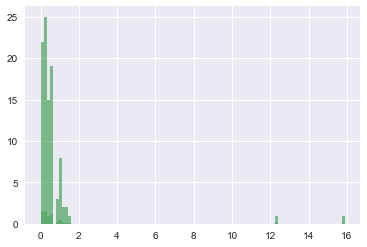

In [344]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)
df = pd.read_csv('del_shock.csv')
y = df['del_effect'] 
y_filt = y[y<2]

n, bins, patches = plt.hist(y, 100, normed=1, facecolor='g', alpha=0.75)
plt.show() 

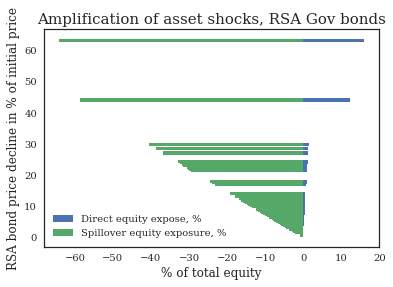

In [467]:


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab


mpl.rcParams.update({'font.size': 11, 'font.family':'serif'})


df = pd.read_csv('del_shock.csv')
#Drag out columns
x_del = np.array(df['del_effect'])
x_total= np.array(df['total_effect'])
x_total_negative = -1 * x_total

y= np.array(df['shock'])

# #exclude extreme data
# x_filt = x[x<1]
# seaborn.distplot(x_filt, bins=100)

bar_width = 1 # default: 0.8


plt.barh(y, x_del, bar_width)
plt.barh(y, x_total_negative, bar_width)

plt.xlabel("% of total equity", fontsize=12)
plt.ylabel(r"RSA bond price decline in % of initial price", fontsize=12)
plt.title("Amplification of asset shocks, RSA Gov bonds", fontsize=15)

plt.legend(['Direct equity expose, %', 'Spillover equity exposure, %'], loc='best')

plt.show()
plt.close()
# plt.legend(['data', 'linear'], loc='best')

AttributeError: 'int' object has no attribute 'barh'

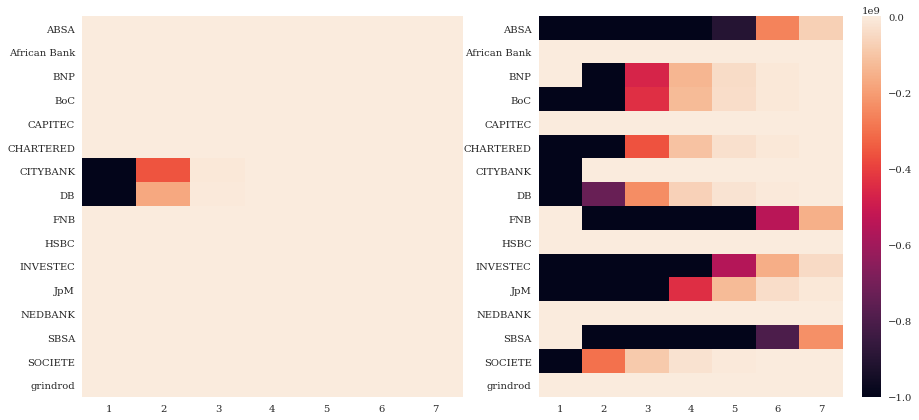

In [555]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
mpl.rcParams.update({'font.size': 11, 'font.family':'serif'})
import seaborn as sbn

tas_bonds_10 = pd.read_csv('heat_bonds_10.csv')
result10 = tas_bonds_10 .pivot(index="bank",columns="period", values="TAS")

tas_50 = pd.read_csv('heat_bonds50.csv')
result50 = tas_50.pivot(index="bank_total_asset_sales",columns="period", values="TAS")

f,(ax1,ax2, axcb) = plt.subplots(1,3,   gridspec_kw={'width_ratios':[1,1,1,0.08] )
ax1.get_shared_y_axes().join(ax2,ax2)                                                     
                                                     
g1 = sns.heatmap(result10, cbar=False, ax=ax1,  vmin=-1e9, vmax=0)
g1.set_ylabel('')
g1.set_xlabel('')
g1.set_yticks([])

g2 = sns.heatmap(result50,ax=ax2,  vmin=-1e9, vmax=0)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
plt.show()


# ax=sns.heatmap(result10,  vmin=-1e9, vmax=0 )



# ax=sns.heatmap(result50,  vmin=-1e9, vmax=0 )




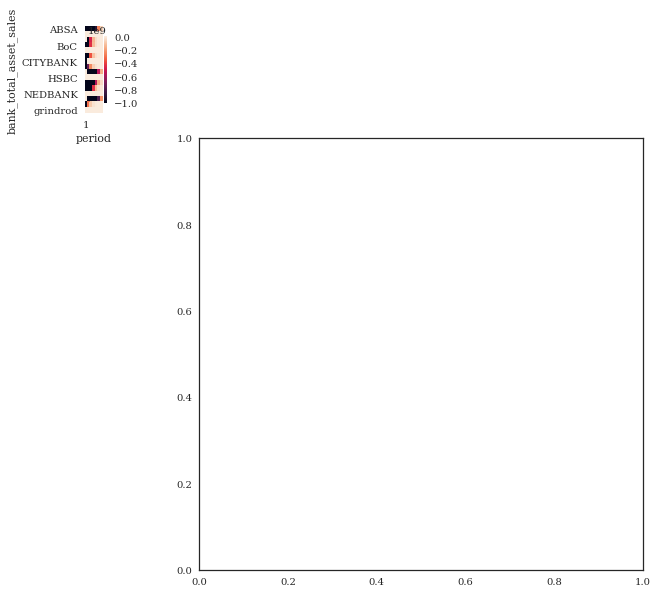

In [539]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
mpl.rcParams.update({'font.size': 11, 'font.family':'serif'})
tas_50 = pd.read_csv('heat_bonds50.csv')
import seaborn as sbn

# ax = sns.heatmap(dfh)
result = tas_50.pivot(index="bank_total_asset_sales",columns="period", values="TAS")

ax=sns.heatmap(result,  vmin=-1e9, vmax=0 )

plt.show()



In [538]:

plt.close()

ValueError: could not convert string to float: SBSA

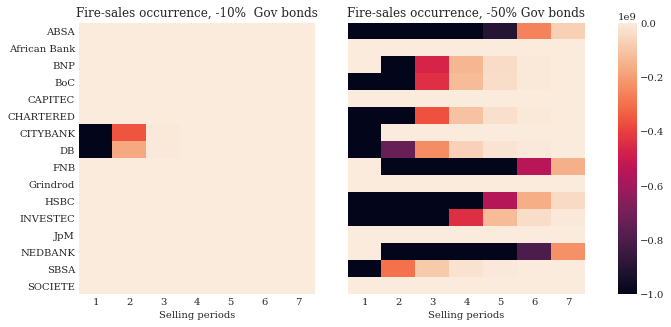

In [18]:
import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

tas_bonds_10 = pd.read_csv('heat_bonds_10.csv')
result10 = tas_bonds_10.pivot(index="bank",columns="period", values="TAS")

tas_50 = pd.read_csv('heat_bonds50.csv')
result50 = tas_50.pivot(index="bank_total_asset_sales",columns="period", values="TAS")

fig,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax1,ax2)


g1 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('Selling periods')
g1.set_title('Fire-sales occurrence, -10%  Gov bonds')
 
g3 = sns.heatmap(result50,vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)

# # may be needed to rotate the ticklabels correctly:
# for ax in [g1,g3]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=90)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=0)

g3.set_ylabel('')
g3.set_xlabel('Selling periods')
g3.set_yticks([])
g3.set_title('Fire-sales occurrence, -50% Gov bonds')

plt.show()


fig.savefig('sys_heat1.eps', format='eps', dpi=1000)


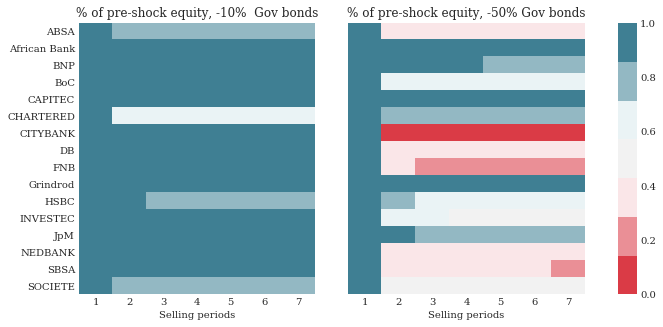

In [19]:
import seaborn  as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
cmap1 = sns.diverging_palette(10, 220, sep=80, n=7)

tas_bonds_10 = pd.read_csv('heat_bonds_10.csv')
result10 = tas_bonds_10.pivot(index="bank",columns="period", values="TAS")

equity_bonds_10 = pd.read_csv('equity_bond_10_norm.csv')
result_equity_bond_10 = equity_bonds_10.pivot("bank","period","equity")

equity_bonds_50 = pd.read_csv('equity_bond_50_norm.csv')

result_equity_bonds_50 = equity_bonds_50.pivot(index="bank",columns="period", values="equity")



fig2,(ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)

#for reverse: "YlGnBu_r"
# center=result_equity_bond_10.loc["ABSA", 4]
g3 = sns.heatmap(result_equity_bond_10, cmap=cmap1, vmin=0, vmax=1,cbar=False,ax=ax1)
g3.set_ylabel('')
g3.set_xlabel('Selling periods')
g3.set_title('% of pre-shock equity, -10%  Gov bonds')
 
g4 = sns.heatmap(result_equity_bonds_50,cmap=cmap1, vmin=0,  vmax=1,ax=ax2, cbar_ax=axcb)
g4.set_ylabel('')
g4.set_xlabel('Selling periods')
g4.set_yticks([])
g4.set_title('% of pre-shock equity, -50% Gov bonds')



# # may be needed to rotate the ticklabels correctly:
# for ax in [g1,g3]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=90)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=0)

plt.show()

fig2.savefig('sys_heat2.pdf', format='pdf', dpi=1000)


plt.close()

In [47]:
"3x2 did not work :("

# import seaborn  as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 10, 'font.family':'serif'})

# cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)

# tas_50 = pd.read_csv('heat_bonds50.csv')
# result50 = tas_50.pivot(index="bank_total_asset_sales",columns="period", values="TAS")
# tas_bonds_10 = pd.read_csv('heat_bonds_10.csv')
# result10 = tas_bonds_10.pivot(index="bank",columns="period", values="TAS")

# equity_bonds_10 = pd.read_csv('equity_bond_10_norm.csv')
# result_equity_bond_10 = equity_bonds_10.pivot("bank","period","equity")
# equity_bonds_50 = pd.read_csv('equity_bond_50_norm.csv')
# result_equity_bonds_50 = equity_bonds_50.pivot(index="bank",columns="period", values="equity")



# f,(ax1,ax2, ax3,ax4, axcb2, axcb2) = plt.subplots(2,3, figsize=(10,5),
#             gridspec_kw={'width_ratios':[1,1, 0.08],'height_ratios':[1,1]})

# ax1.get_shared_y_axes().join(ax1,ax2)

# g1 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
# g1.set_ylabel('')
# g1.set_xlabel('Selling periods')
# g1.set_title('Fire-sales occurrence, -10%  Gov bonds')
 
# g3 = sns.heatmap(result50,vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
# g3.set_ylabel('')
# g3.set_xlabel('Selling periods')
# g3.set_yticks([])
# g3.set_title('Fire-sales occurrence, -50% Gov bonds')


ax3.get_shared_y_axes().join(ax3,ax4)

# center=result_equity_bond_10.loc["ABSA", 4]
g1 = sns.heatmap(result_equity_bond_10, cmap="YlGnBu_r", vmin=0, vmax=1,cbar=False,ax=ax3)
g1.set_ylabel('')
g1.set_xlabel('Selling periods')
g1.set_title('Remaining equity in%, -10%  Gov bonds')
 
g3 = sns.heatmap(result_equity_bonds_50,cmap="YlGnBu_r", vmin=0,  vmax=1,ax=ax4, cbar_ax=axcb2)
g3.set_ylabel('')
g3.set_xlabel('Selling periods')
g3.set_yticks([])
g3.set_title('Remaining equity in %, -50% Gov bonds')


# # may be needed to rotate the ticklabels correctly:
# for ax in [g1,g3]:
#     tl = ax.get_xticklabels()
#     ax.set_xticklabels(tl, rotation=90)
#     tly = ax.get_yticklabels()
#     ax.set_yticklabels(tly, rotation=0)

plt.close()

ValueError: need more than 2 values to unpack

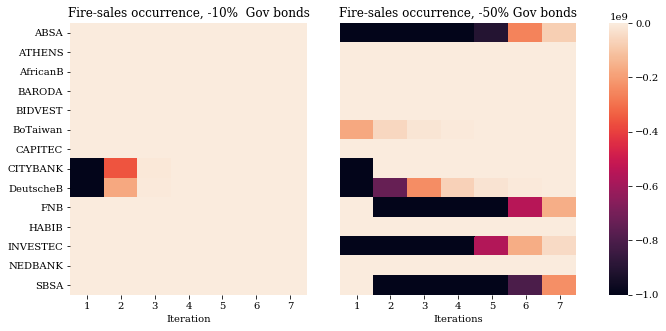

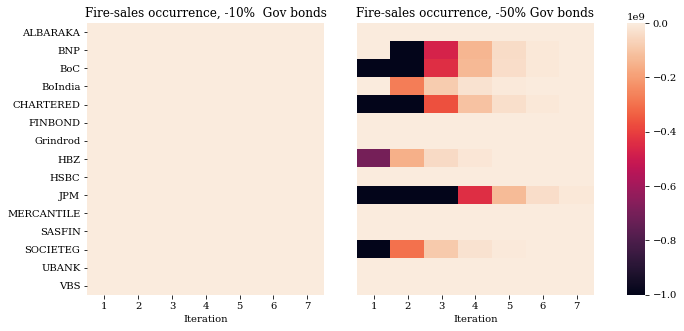

In [4]:
tas_bonds_10 = pd.read_csv('heat_10_7_1.csv')

result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")

tas_50 = pd.read_csv('heat_50_7_1.csv')
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")

fig, (ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})

ax1.get_shared_y_axes().join(ax1,ax2)
g1 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('Iteration')
g1.set_title('Fire-sales occurrence, -10%  Gov bonds') 
g3 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)
g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_yticks([])
g3.set_title('Fire-sales occurrence, -50% Gov bonds')

fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/heat_asset1.pdf', format="pdf", bbox_inches='tight')


####################
tas_bonds_10 = pd.read_csv('heat_10_7_2.csv')
tas_bonds_10 
result10 = tas_bonds_10.pivot(index="bank",columns="iteration", values="TAS")
tas_50 = pd.read_csv('heat_50_7_2.csv')
result50 = tas_50.pivot(index="bank",columns="iteration", values="TAS")
fig, (ax1,ax2, axcb) = plt.subplots(1,3, figsize=(10,5),
            gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax1,ax2)

g1 = sns.heatmap(result10, vmin=-1e9, vmax=0,cbar=False,ax=ax1)

g1.set_ylabel('')
g1.set_xlabel('Iteration')
g1.set_title('Fire-sales occurrence, -10%  Gov bonds') 
g3 = sns.heatmap(result50, vmin=-1e9, vmax=0,ax=ax2, cbar_ax=axcb)

g3.set_ylabel('')
g3.set_xlabel('Iteration')
g3.set_yticks([])
g3.set_title('Fire-sales occurrence, -50% Gov bonds')

fig.savefig('/Users/Tina/Dropbox/phd/projects/dissertation/write_up/Chapters/Chapter2/figures/heat_asset2.pdf', format="pdf", bbox_inches='tight')

plt.show()